In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
plot_data = pd.read_csv('/Users/ellapalacios/Downloads/tree_proj/data/WA_PLOT.csv')

In [46]:
plot_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 69 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CN                              22083 non-null  int64  
 1   SRV_CN                          22083 non-null  int64  
 2   CTY_CN                          22083 non-null  int64  
 3   PREV_PLT_CN                     9844 non-null   float64
 4   INVYR                           22083 non-null  int64  
 5   STATECD                         22083 non-null  int64  
 6   UNITCD                          22083 non-null  int64  
 7   COUNTYCD                        22083 non-null  int64  
 8   PLOT                            22083 non-null  int64  
 9   PLOT_STATUS_CD                  22083 non-null  int64  
 10  PLOT_NONSAMPLE_REASN_CD         979 non-null    float64
 11  MEASYEAR                        22083 non-null  int64  
 12  MEASMON                         

In [47]:
#trimming off un-needed features
plot_data = plot_data[['CN', 'PLOT', 'MEASYEAR', 'MEASMON', 'WATERCD', 'LAT', 'LON', 'ELEV']]

In [48]:
#dropping off NA so we're left with full water. 
plot_data1 = plot_data.dropna()
plot_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13158 entries, 0 to 21894
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CN        13158 non-null  int64  
 1   PLOT      13158 non-null  int64  
 2   MEASYEAR  13158 non-null  int64  
 3   MEASMON   13158 non-null  int64  
 4   WATERCD   13158 non-null  float64
 5   LAT       13158 non-null  float64
 6   LON       13158 non-null  float64
 7   ELEV      13158 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 925.2 KB


Codes 4, 5, & 9 == temporary water, though the amount changes.   
Code 0 == no permeant water.     
Code 1, 2 == some permenant water, type differs.  
Code 3 == human made water movement.  

Some of this refers to non-census water: Non-census water means streams, sloughs, estuaries, and canals more than 120 feet and less than 1/8 of a mile wide. Lakes, reservoirs, and ponds one (1) to 40 acres in size.

In [49]:
plot_data1.head(10)

,CN,PLOT,MEASYEAR,MEASMON,WATERCD,LAT,LON,ELEV
0,13229216010497,99851,2002,7,4.0,47.966031,-123.184900,2500.0
1,24121999010900,59643,2002,7,0.0,47.639772,-120.416372,4300.0
2,24143771010900,72767,2002,9,1.0,47.432623,-123.763728,500.0
3,24132612010900,60111,2002,9,0.0,46.169883,-122.280547,2900.0
4,24169827010900,93596,2002,8,0.0,48.615504,-119.910791,7100.0
6,24174388010900,84273,2002,9,0.0,48.979161,-120.489397,6700.0
7,24204728010900,53377,2002,8,8.0,48.848467,-121.774165,3700.0
8,24124884010900,80234,2003,7,0.0,47.950844,-120.833212,5700.0
9,24155744010900,56804,2002,10,0.0,47.419276,-121.119147,2900.0
10,24172809010900,96057,2002,9,0.0,48.825543,-120.494181,6300.0


Seeing a few water code 8... let's figure out how many there are of this and where they are.

In [54]:
#sorting and filtering

plot_data1 = plot_data1.sort_values(by  = 'WATERCD')
water_code8 = plot_data1.loc[plot_data1['WATERCD'] == 8.0] #where all water code is 8. 


In [51]:
#plotting
import seaborn as sns
import plotly.express as px

fig = px.scatter_geo(water_code8, lat='LAT', lon='LON')
fig.update_traces(marker = dict(size = 2))
fig.update_layout(mapbox_center={"lat": 47.5, "lon": -120.0})
fig.show()

Geographically, these are random. They appear to line up with forested areas in WA, but no real pattern other than following the main line of the cascades. It's worth looking if they each have similar elevation codes.

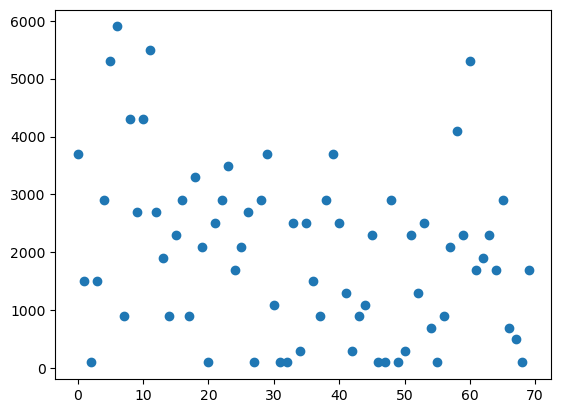

In [53]:
xvals = np.arange(0,70, 1)
plt.plot(xvals,water_code8['ELEV'], "o")
plt.show()

No pattern to elevation for water code 8 as well... water code 8, who and what are you? 

In [56]:
#looking at where each plot has different water types based on lat and lon.
fig = px.scatter_mapbox(plot_data1, lat='LAT', lon='LON',color = "WATERCD",zoom=5,mapbox_style="open-street-map")

fig.update_traces(marker = dict(size = 2))

fig.update_layout(
    mapbox_center={"lat": 47.5, "lon": -120.0},  # Center on Washington
)


Looks like water code is primarly 0 - 4. Next we should look at the occurance of each. This tells us that there isn't a lot of temporary water, it's either perm or not. This would be easy to one-hot encode since the data is essantially binary. I'll look at a histogram next to investigate the freqneucy of each water type.

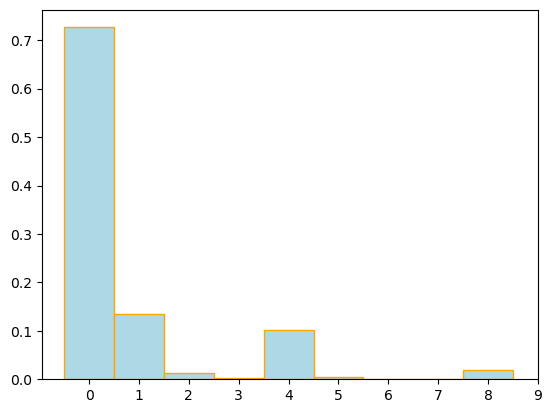

In [84]:
plt.hist(plot_data1['WATERCD'], bins = 9, density=True, align='left', color='lightblue', ec = 'orange')
plt.xticks(np.arange(0,10,1))
plt.show()

This tell us that almost 70% of the data is type 0 (no perm water), approximately 15% type 1 (some perm water), & approximately 15% type 4 and less than 5% code 8, which are both temporary water types. Running on the assumption here that code 8 is replacing code 9, since there are no code 9's. Encoding these are perm or not would cover approx 85% of the data, we could do a water or non regardless of level of water encode which would cover everything. 